<h2> Transfer Learning - VGG16 + ANN (1 hidden 128 nodes)</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
X = pickle.load(open('/content/drive/MyDrive/Dataset/Apple/X.pickle', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Dataset/Apple/y.pickle', 'rb'))

In [ ]:
X.shape

(3446, 80, 80, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import numpy as np

<h3>VGG16</h3>

In [ ]:
vgg = VGG16(input_shape=(80,80,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
#y = y.reshape(13138, 1)

In [ ]:
# y.shape

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

<h3>ANN</h3>

In [ ]:
x = Dense(128, activation='relu', name='fcl')(x)

In [ ]:
x = Dropout(0.3)(x)

In [ ]:
prediction = Dense(4, activation='softmax', name='prediction')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 80, 80, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 80, 80, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
87/87 [==============================] - 13s 28ms/step - loss: 2.2304 - accuracy: 0.7562
Epoch 2/10
87/87 [==============================] - 2s 22ms/step - loss: 0.3619 - accuracy: 0.8901
Epoch 3/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1846 - accuracy: 0.9340
Epoch 4/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1367 - accuracy: 0.9496
Epoch 5/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1218 - accuracy: 0.9561
Epoch 6/10
87/87 [==============================] - 2s 22ms/step - loss: 0.1026 - accuracy: 0.9601
Epoch 7/10
87/87 [==============================] - 2s 24ms/step - loss: 0.0814 - accuracy: 0.9717
Epoch 8/10
87/87 [==============================] - 2s 24ms/step - loss: 0.0722 - accuracy: 0.9724
Epoch 9/10
87/87 [==============================] - 2s 23ms/step - loss: 0.0599 - accuracy: 0.9826
Epoch 10/10
87/87 [==============================] - 2s 22ms/step - loss: 0.0489 - accuracy: 0.9815


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

22/22 [==============================] - 1s 50ms/step - loss: 0.2402 - accuracy: 0.9377
Test Loss: 0.2402055412530899
Test Accuracy: 0.9376811385154724


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Test set metrics
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

test_precision = precision_score(y_test, test_pred, average='macro')
test_recall = recall_score(y_test, test_pred, average='macro')
test_f1_score = f1_score(y_test, test_pred, average='macro')

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


22/22 [==============================] - 1s 20ms/step
Test Precision: 0.9283129392765628
Test Recall: 0.924029809194644
Test F1 Score: 0.9260785147625608


22/22 [==============================] - 0s 20ms/step


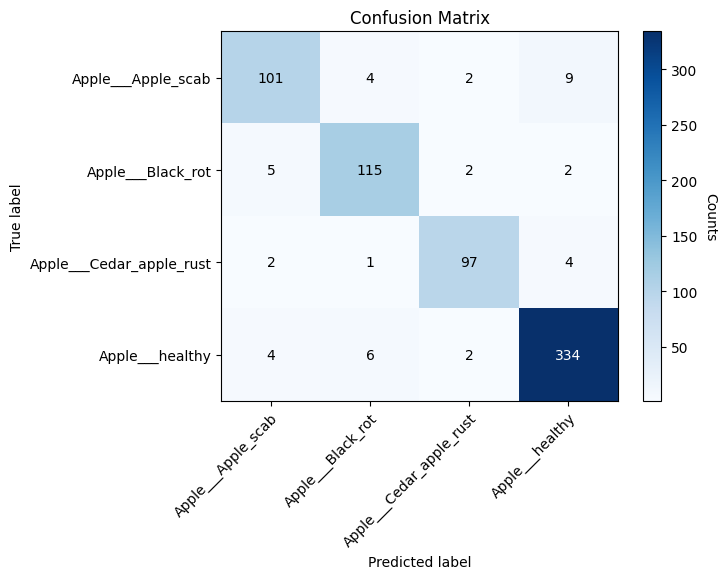

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain predictions for the test set
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Counts', rotation=-90, va="bottom")

# Set axis labels and title
class_names = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']  # Replace with your class names
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='auto')

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Show the plot
plt.show()
